# Cargando las librerias requeridas

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

In [ ]:
#Instalando el modulo requerido
import sys
!{sys.executable} -m pip install pyclustertend

In [2]:
np.__version__

'1.20.0'

In [4]:
!{sys.executable} -m pip install -U numpy==1.20
# !{sys.executable} -m pip install -U Numba==0.54.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.20.0 which is incompatible.
pyclustertend 1.8.2 requires numpy==1.20.3, but you have numpy 1.20.0 which is incompatible.
ml-dtypes 0.0.4 requires numpy>1.20, but you have numpy 1.20.0 which is incompatible.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.20.0 which is incompatible.
jaxlib 0.4.7+cuda11.cudnn86 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [5]:
np.__version__

'1.22.4'

In [3]:
from sklearn import datasets
iris = datasets.load_iris() #Cargando el dataset de vino
print(iris.keys()) #Analizando las variables que tiene

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris.data) #Transformamos los datos

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


# Hopkins statistics
La función hopkins del paquete pyclustertend permite calcular la tendencia de hopkins en forma rápida. Sin embargo, tiene problemas con largos set de datos.<br>

La función recibe solo dos parámetros, los datos y el número de puntos aleatorios a generar.<br>
hopkins(dataset,numSample)

Recuerde calcula 1 menos el valor del test

Coeficiente de Hopkins, datos de iris escalados: 0.8002062889510937


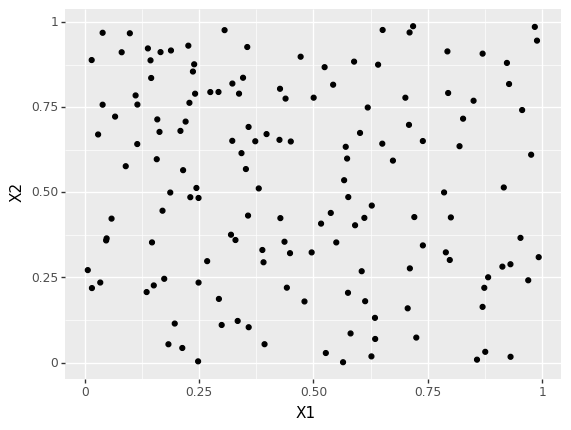


Coeficiente de Hopkins, datos aleatorios: 0.47069612109410497


In [4]:
#Importando la función de hopkins
from pyclustertend import hopkins

print("Coeficiente de Hopkins, datos de iris escalados:",1-hopkins(scaled_features,50))

#Generando 150 datos aleatorios
tempData=np.random.uniform(low=0,high=1,size=(150,2))
tempData=pd.DataFrame(tempData,columns=["X1","X2"])
print(ggplot(tempData)+aes(x="X1",y="X2")+geom_point())
print("Coeficiente de Hopkins, datos aleatorios:",1-hopkins(tempData,30))



# Evaluación matriz de distancia
Para evaluar la matriz de distancia entre los puntos, utilizaremos las funciones vat del paquete pyclustertend. Tal como en el caso anterior, se tiene problemas con largos set de datos.<br>

La función recibe un set de datos y despliega la matriz de distancia en forma ordenada para mejorar su visualización.


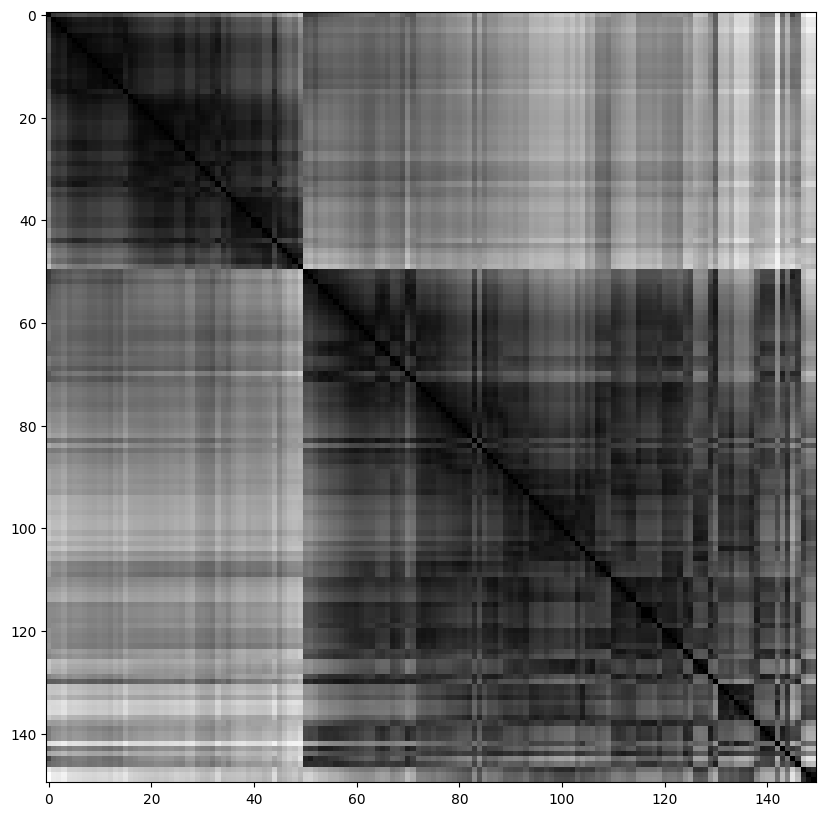

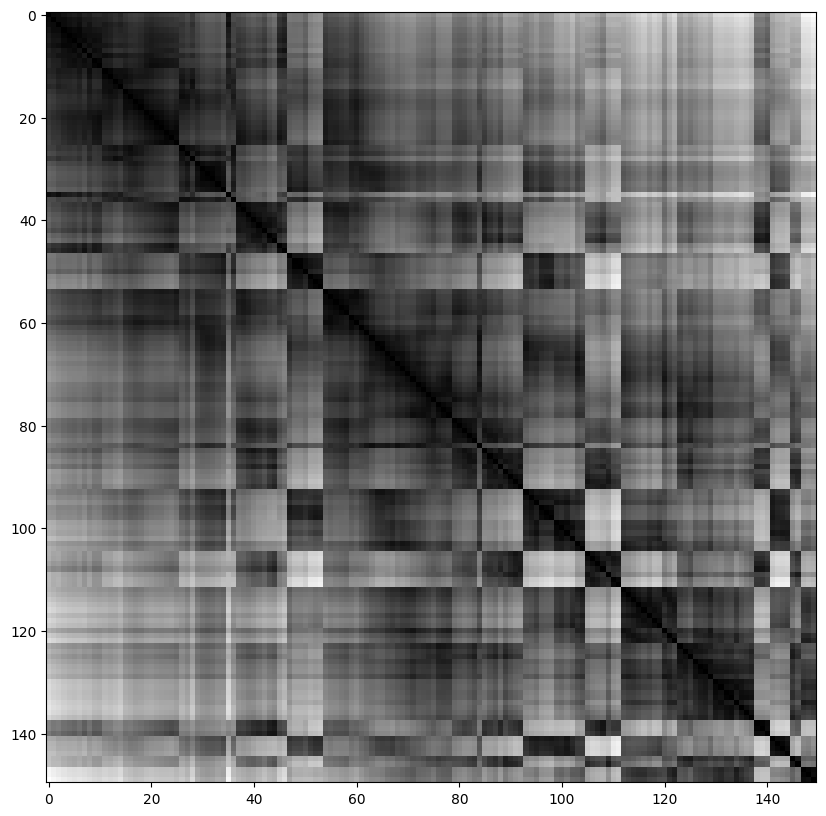

In [5]:
from pyclustertend import vat
vat(scaled_features)
vat(tempData)

# Cohesion y separación
Los coeficientes de cohesión y separación deben ser calculados por nosotros mismos. Por lo cual, usando el código de abajo podemos calcularlos en forma rápida.

In [6]:
#Calculando la cohesión y separación
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km=km.fit(scaled_features)

tempCohesion=0
for j in range(km.n_clusters):
    #Calculando el centro del clusters
    #centroCluster=np.mean(scaled_features[km.labels_==j,:],axis=0)
    centroCluster=km.cluster_centers_[j,:]
    #Calculando la cohesion para ese cluster
    tempCohesion+=np.square(scaled_features[km.labels_==j,:]-centroCluster).sum()
print("Cohesión: ",tempCohesion)
print("Inertia: ",km.inertia_) #For k-means

tempSeparacion=0
#Calculando el centro de los datos
centroData=np.mean(scaled_features,axis=0)
for j in range(km.n_clusters):
    #Calculando el centro del clusters
    #centroCluster=np.mean(scaled_features[km.labels_==j,:],axis=0)
    centroCluster=km.cluster_centers_[j,:]
    #Calculando la separación para ese cluster
    tempSeparacion+=(km.labels_==j).sum()*np.square(centroCluster-centroData).sum()
print("Separación: ",tempSeparacion)
print("Separación + cohesión: ",tempSeparacion+tempCohesion)



Cohesión:  222.36170496502305
Inertia:  222.36170496502302
Separación:  377.6382950349771
Separación + cohesión:  600.0000000000001


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


# Coeficiente de silhouette 

El coeficiente de silhouette promedio se calcula con la función silhouette_score del paquete sklearn.metrics.<br>
silhouette_score(X, labels, metric='euclidean', sample_size=None, random_state=None)<br><br>
Parámetros
* X: set de datos o matriz de distancia.
* labels: etiquetas de los clusters.
* metric: métrica de distancia a utilizar, si X es una matriz de distancia se utiliza "precomputed".
* sample_size: número de puntos (para grandes bases de datos).
* random_state: inicialización del número aleatorio para el sampleo.<br><br>

De igual manera, la función silhouette_samples calcula el coeficiente de Silhouette para cada punto por separado<br>
silhouette_samples(X, labels, metric='euclidean')
<br><br>
Parámetros
* X: set de datos o matriz de distancia.
* labels: etiquetas de los clusters.
* metric: métrica de distancia a utilizar, si X es una matriz de distancia se utiliza "precomputed".

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
numClusters=3
km = KMeans(n_clusters=numClusters)
km=km.fit(scaled_features)

#Calculando el coeficiente de Silhouette para cada muestra
sample_silhouette_values = silhouette_samples(scaled_features, km.labels_)
print(sample_silhouette_values)

#Calculando el coeficiente de silhouette promedio
silhouette_avg = silhouette_score(scaled_features, km.labels_)
print("Para n_clusters =", numClusters,"el coeficiente promedio de silhouette_score es:", silhouette_avg)
print("Equivalente a ",np.average(silhouette_samples(scaled_features, km.labels_)))


[ 0.73419485  0.56827391  0.67754724  0.62050159  0.72847412  0.60988485
  0.69838355  0.73081691  0.48821004  0.63154089  0.67418286  0.72179392
  0.57847213  0.54944562  0.55294537  0.45806886  0.62112236  0.72875221
  0.58590385  0.67746392  0.66042913  0.69021224  0.69653476  0.63737612
  0.70132024  0.54494792  0.70471457  0.72151031  0.71451919  0.66776336
  0.62562482  0.64783099  0.58967022  0.54088124  0.62843507  0.67614681
  0.66543365  0.72441906  0.5526219   0.72470474  0.73333453  0.07766666
  0.63725809  0.66371521  0.64863547  0.5593465   0.67881722  0.66606206
  0.68912398  0.71077363  0.34169992  0.16627565  0.35854546  0.54373992
  0.1327061   0.53878741  0.23206569  0.40978046  0.03768897  0.54390267
  0.42467141  0.34088756  0.4694655   0.33187646  0.4951792   0.18906699
  0.39249659  0.54918014  0.40350566  0.58259179  0.03645185  0.45853055
  0.366386    0.42610282  0.21912232  0.05112346  0.04063911  0.34222491
  0.3744773   0.55591003  0.56667628  0.55697725  0

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


<ipython-input-8-77844816fdb7>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-8-77844816fdb7>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-8-77844816fdb7>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


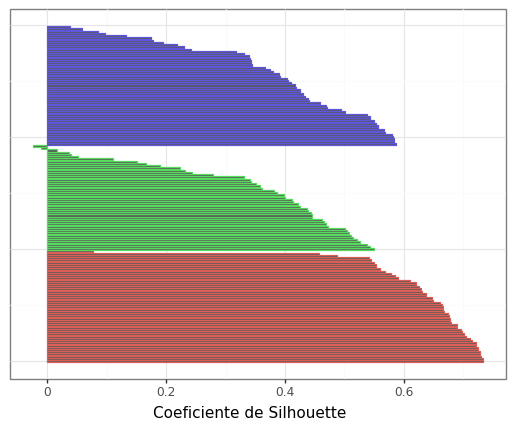

<ggplot: (8776474191153)>

In [8]:
#Visualizando los coeficientes de Silhouette
tempDF = pd.DataFrame(columns=['SC','labels'])
for i in range(km.n_clusters):
    #Ordenando los valores de cada cluster
    tempData=np.sort(sample_silhouette_values[km.labels_==i])[::-1]#para mostrarlos de menor a mayor
    tempDF2=pd.DataFrame(tempData,columns=["SC"])
    tempDF2["labels"]=i
    #Agregandolo a un nuevo data frame
    tempDF=tempDF.append(tempDF2)
tempDF.reset_index()
(ggplot(tempDF)+aes(y="SC",x=range(150),color="factor(labels)")
 +geom_col(show_legend=False)+coord_flip()+theme_bw()
 +labs(y="Coeficiente de Silhouette")+theme(axis_text_y=element_blank(),axis_ticks_major_y=element_blank())
)

# Buscando el mejor número de clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

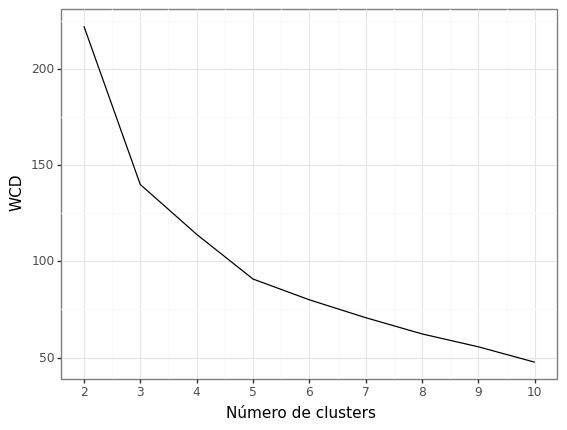

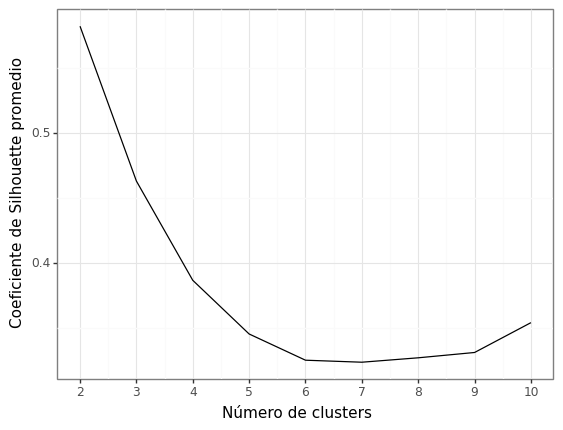

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
maxK=11
sse = np.zeros(maxK-2) # NO USAR []
CS = np.zeros(maxK-2) # NO USAR []
for k in range(2, maxK):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    sse[k-2]=kmeans.inertia_ #NO USAR sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    CS[k-2]=silhouette_avg #NO USAR CS.append(silhouette_avg)
    
#Generating the dataframa
tempData=pd.DataFrame(range(2, maxK),columns=["K"])
tempData["sse"]=sse
tempData["CS"]=CS
print(ggplot(tempData)+aes(x="K",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")+scale_x_continuous(breaks=range(1,maxK)))
print(ggplot(tempData)+aes(x="K",y="CS")+theme_bw()+geom_line()+labs(x="Número de clusters",y="Coeficiente de Silhouette promedio")+scale_x_continuous(breaks=range(1,maxK)))    
